In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


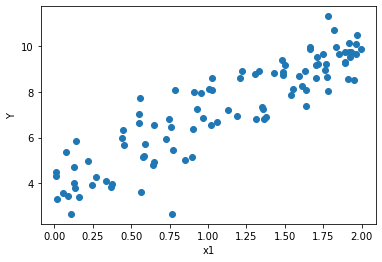

In [290]:
X = 2 * np.random.rand(100,1) #created some data 
y = 4 + 3 * X + np.random.randn(100,1) # linear data with noise
plt.scatter(X,y)
plt.xlabel('x1')
plt.ylabel('Y')
plt.show()

# Function y= 4+3*x1 +Gaussian noise ,so theta0 must be close to 4 while theta1 close to 3.


# A) Closed-from equations for optimization 

# Techinique 1 :Normal Equation to find model parameters

In [291]:
X_b = np.c_[np.ones((100,1)),X]  # add x0=1 to each instance 

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [292]:
theta_best

array([[3.82013988],
       [3.10139092]])

# Making predictions using  yhat = theta_best * x and plotting it


In [293]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.82013988],
       [10.02292172]])

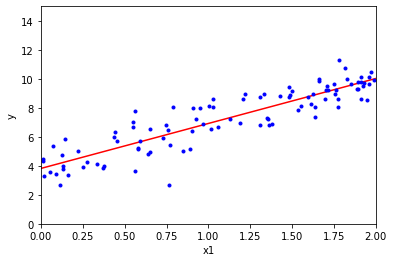

In [294]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

# Technique 2:Finding model parameters using Scikit learn library using Singular Value Decomposition technique

In [295]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression()

In [296]:
lin_reg.intercept_,lin_reg.coef_

(array([3.82013988]), array([[3.10139092]]))

In [297]:
lin_reg.intercept_[0]*X_new  + lin_reg.intercept_[0]

array([[ 3.82013988],
       [11.46041964]])

Text(0, 0.5, 'y')

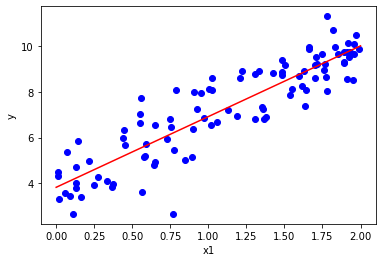

In [298]:
plt.scatter(X, y,  color='blue')
plt.plot(X_new, lin_reg.coef_[0][0]* X_new + lin_reg.intercept_[0], '-r')
plt.xlabel("x1")
plt.ylabel("y")

# Linear regression class works using least squares which is based on the concept of pseudoinverse


In [299]:

theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond = 1e-6)
theta_best_svd

array([[3.82013988],
       [3.10139092]])

# Computation of pseudoinverse is encapsulated in the Linear Regression class .Psuedoinverse of X is directly applicable even when matrices are not invertible#

In [300]:

np.linalg.pinv(X_b).dot(y)

array([[3.82013988],
       [3.10139092]])

# 2) Iterative optimization

#  Techinique 1: Batch Gradient descent alogorithm 

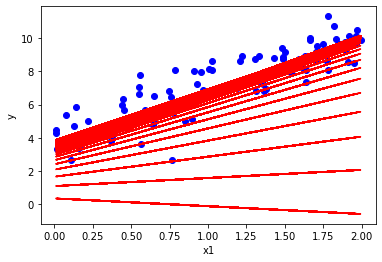

In [320]:
n_iteration = 1000
eta = 0.1 #learning rate(tried later by varying  eta =0.2 ,eta = 0.5)
m = 100

theta = np.random.randn(2,1)
cost_list = []   #to record all cost values to this list
theta_list = []  #to record all theta_0 and theta_1 values to this list 
prediction_list = []
plt.scatter(X,y,color='blue')
 
for iteration in range(n_iteration):
    prediction = np.dot(X_b, theta) #predicted y values theta_0*x0+theta_1*x1
    plt.plot(X, prediction,'-r')
    plt.xlabel('x1')
    plt.ylabel('y')
    prediction_list.append(prediction)
    error = prediction - y
    cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]  or 1/2 Mean square error
    cost_list.append(cost)
    theta = theta - (eta* (1/m) * np.dot(X_b.T, error))  
    # eta* (1/m) * sum[error*x]
    theta_list.append(theta)


In [321]:
theta

array([[3.82013983],
       [3.10139096]])

In [322]:
c = np.reshape(cost_list,(-1,1))


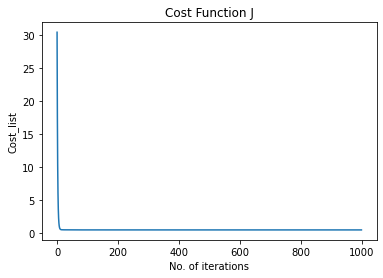

In [323]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost_list')
plt.plot(c)

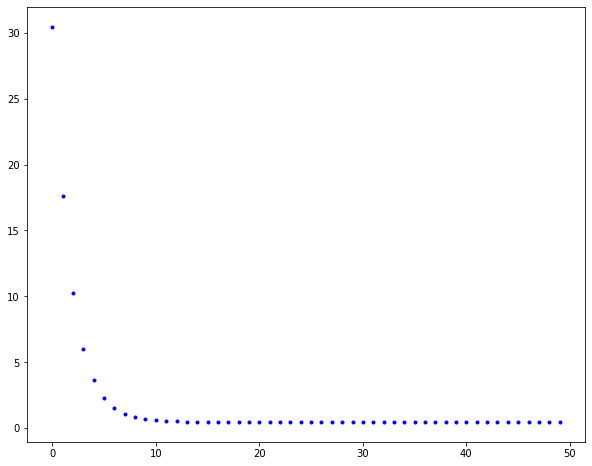

In [324]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(50),c[:50],'b.')

# Hyperparamter tuning 

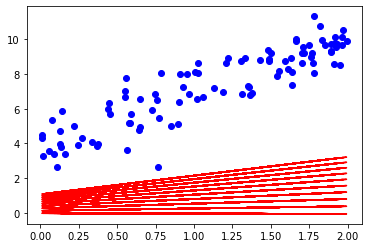

In [325]:
eta = 0.02
theta = np.random.randn(2,1)# random initialization
plt.scatter(X, y,  color='blue')
for iteration in range(10):
    gradients = 1/m*X_b.T.dot(X_b.dot(theta)-y)#gradient vector of the cost function
    plt.plot(X, theta[0][0]*X + theta[0], '-r')
    theta = theta - eta*gradients
    



In [326]:
theta

array([[1.16765536],
       [1.43740446]])

Text(0, 0.5, 'y')

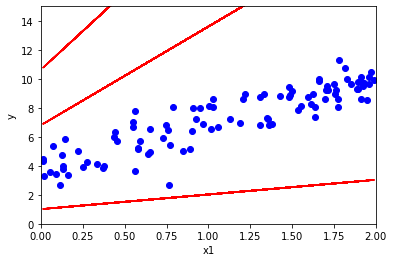

In [327]:
eta = 0.5
theta = np.random.randn(2,1)# random initialization
plt.scatter(X, y,  color='blue')
for iteration in range(10):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    plt.plot(X, theta[0][0]*X + theta[0], '-r')
    theta = theta - eta*gradients

plt.axis([0,2,0,15])
plt.xlabel("x1")
plt.ylabel("y")

#  Tehnique 2: Stochastic Gradient Descent 


In [336]:
n_epochs = 10
theta = np.random.randn(2,1)
m =1000
eta = 0.1
avg1=[]

for epoch in range(n_epochs):
    cost =0
    for i in range(m):
        random_index = np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        prediction = xi.dot(theta)
        error = prediction - yi
        cost+=1/2*np.dot(error.T, error)
        gradients = xi.T.dot(error)
        theta = theta -eta *gradients
        avgcost=cost/m
    avg1.append(avgcost)

In [337]:
avgcost

array([[0.03987761]])

In [338]:
avg1

[array([[0.11138682]]),
 array([[0.0639682]]),
 array([[0.05600467]]),
 array([[0.04382228]]),
 array([[0.04864733]]),
 array([[0.05884196]]),
 array([[0.04518766]]),
 array([[0.03489175]]),
 array([[0.04211054]]),
 array([[0.03987761]])]

In [339]:
theta

array([[3.94815888],
       [2.81878448]])

In [340]:
c1 = np.reshape(avg1,(-1,1))


# Checking for its convergence

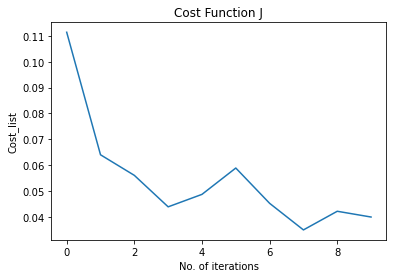

In [341]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost_list')
plt.plot(c1)

# SGD using sckit learn

In [342]:
# SGD using sckit learn
from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(max_iter = 50, penalty =None,eta0 = 0.1 )
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [343]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.79138955]), array([3.07816294]))

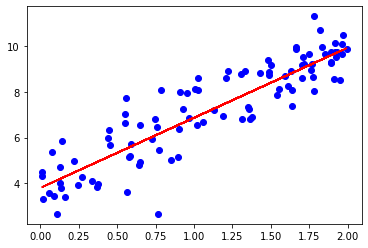

In [344]:
plt.scatter(X,y,color ='blue')
plt.plot(X, sgd_reg.coef_[0]*X+ sgd_reg.intercept_[0] ,'-r')
        